## Hierarchical Clustering for seeding
Clustering teams according to stats for seeding in 8 groups with 8 teams each.

In [1]:
# import necessary packages
import os
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
def get_team_data(filter_year=None,datasets_dir=None,stats_file_name=None):
    datasets_dir = '../datasets'
    stats_file_name = 'Stats by team and year 2010-2018.csv'
    stats_file_path = os.path.join(datasets_dir, stats_file_name) 
    df_stats = pd.read_csv(stats_file_path, sep=',')
    df_stats = df_stats.loc[:, ~df_stats.columns.str.contains('^Unnamed')]
    df_stats = df_stats.loc[:, df_stats.columns.str.contains('Norm$|Year|Seed')]
    #print(df_stats)
    if filter_year != None:
        df_stats = df_stats.loc[df_stats['Year'] == filter_year,:]
    df_stats = df_stats.loc[df_stats['Seed'] != 0,:]
    df_stats = df_stats.drop(['Year','Seed Norm'],axis=1)
    #df_stats['School ID'] = df_stats['School ID'].str.replace('/.+','')
    label = df_stats['Seed']
    data = df_stats.loc[:, ~df_stats.columns.str.contains('Seed')]
    data = data.reset_index(drop=True)
    label = label.reset_index(drop=True)
    return label, data

In [3]:
seeds, team_stats = get_team_data(filter_year=None, datasets_dir='../datasets', stats_file_name=None)

In [4]:
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   W-L% Norm             576 non-null    float64
 1   SOS Norm              576 non-null    float64
 2   ORtg Norm             576 non-null    float64
 3   DRtg Norm             576 non-null    float64
 4   FG% Norm              576 non-null    float64
 5   WL% * SOS Norm        576 non-null    float64
 6   3P% Norm              576 non-null    float64
 7   FT% Norm              576 non-null    float64
 8   PPG Norm              576 non-null    float64
 9   OPPG Norm             576 non-null    float64
 10  APG Norm              576 non-null    float64
 11  TOVPG Norm            576 non-null    float64
 12  Adjusted WL% Norm     576 non-null    float64
 13  Adjusted Margin Norm  576 non-null    float64
dtypes: float64(14)
memory usage: 63.1 KB


In [5]:
seeds.value_counts()

16    36
15    36
14    36
13    36
12    36
11    36
10    36
9     36
8     36
7     36
6     36
5     36
4     36
3     36
2     36
1     36
Name: Seed, dtype: int64

/home/max/PycharmProjects/CS7641-NCAA-Predictions/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/max/PycharmProjects/CS7641-NCAA-Predictions/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/max/PycharmProjects/CS7641-NCAA-Predictions/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.sta

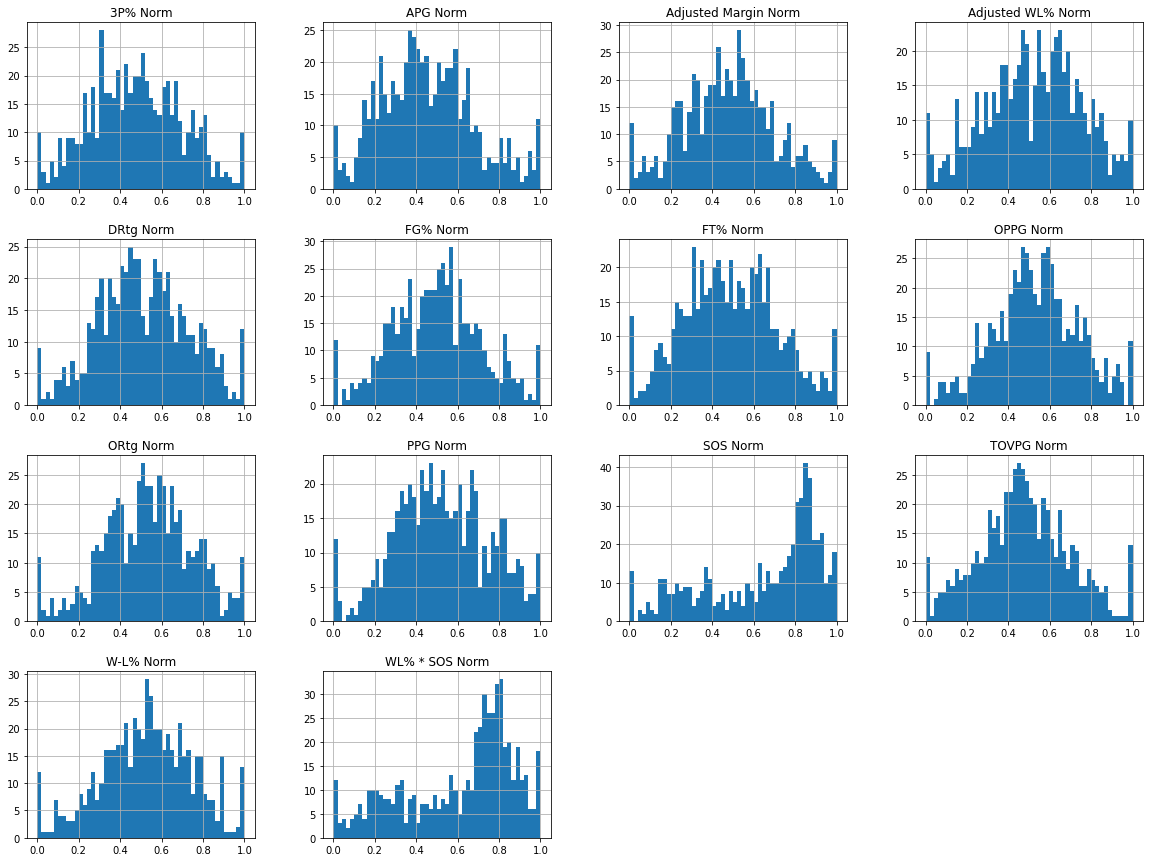

In [6]:
%matplotlib inline
team_stats.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
team_stats.columns

Index(['W-L% Norm', 'SOS Norm', 'ORtg Norm', 'DRtg Norm', 'FG% Norm',
       'WL% * SOS Norm', '3P% Norm', 'FT% Norm', 'PPG Norm', 'OPPG Norm',
       'APG Norm', 'TOVPG Norm', 'Adjusted WL% Norm', 'Adjusted Margin Norm'],
      dtype='object')

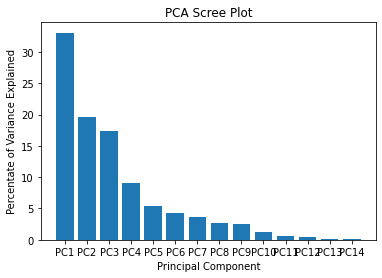

In [8]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(team_stats)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14']
plt.bar(x= range(1,15), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [9]:
variance = 0
dim = 1
while variance < .95:
    variance = np.sum(pca.explained_variance_ratio_[:dim])
    dim = dim + 1
print(dim,variance)

9 0.9511581999624751


In [10]:
pca3 = PCA(n_components=3)
pC3 = pca3.fit_transform(team_stats)
pDf3 = pd.DataFrame(data = pC3
             , columns = ['pc1', 'pc2', 'pc3'])

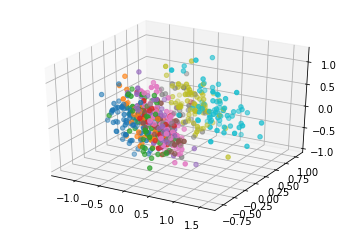

In [11]:
scatter3D = plt.figure().gca(projection='3d')
scatter3D.scatter(pDf3['pc1'],pDf3['pc2'],pDf3['pc3'],c=seeds,cmap=plt.get_cmap('tab10'))
#principalDf.plot(kind='scatter',x='pc1',y='pc2',z='pc3',c=seeds,cmap=plt.get_cmap('tab10'),colorbar=True)
#plt.legend()

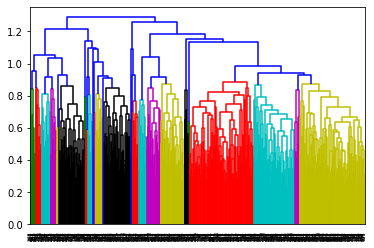

In [21]:
clDf = principalDf.drop(['PC10','PC11','PC12','PC13','PC14'],axis=1)

Z = hierarchy.linkage(clDf,'average','euclidean')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

In [26]:
Zt = hierarchy.ward(clDf)
predSeed16 = hierarchy.cut_tree(Zt,n_clusters=[1, 16])
predSeed16.shape



(576, 2)